In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

<h1>Reading the dataset and finding the size</h1>

In [3]:
uber_df = pd.read_csv("My Uber Drives - 2016.csv")

In [4]:
# First 5 records 
uber_df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [5]:
# Last 5 records 
uber_df.tail()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [6]:
# The  shape and size of data 
print(uber_df.shape)
print (uber_df.size)

(1156, 7)
8092


<h1>Identifying the data types of columns</h1>

In [7]:
# Columns names 
uber_df.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')

In [8]:
print(uber_df['CATEGORY*'].unique())

['Business' 'Personal' nan]


In [9]:
print(uber_df['PURPOSE*'].unique())

['Meal/Entertain' nan 'Errand/Supplies' 'Meeting' 'Customer Visit'
 'Temporary Site' 'Between Offices' 'Charity ($)' 'Commute' 'Moving'
 'Airport/Travel']


In [10]:
# Data  type of the columns 

uber_df.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

**The dataset has 1 numerical variable and 6 categorical variables**

<h1>Data Cleaning</h1>

In [11]:
# Check the missing values 
uber_df.isnull().any()

START_DATE*    False
END_DATE*       True
CATEGORY*       True
START*          True
STOP*           True
MILES*         False
PURPOSE*        True
dtype: bool

In [12]:
#Get the number of missing values in each column
uber_df.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [13]:
#Duplicated Records needs to be removed 

uber_df[uber_df.duplicated()]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
492,6/28/2016 23:34,6/28/2016 23:59,Business,Durham,Cary,9.9,Meeting


In [14]:
# Dropping the duplicates values 

uber_df.drop_duplicates()

# Get the initial data with dropping the NA values
uber_df = uber_df.dropna()

#Get the shape of the dataframe after removing the null values
uber_df.shape

(653, 7)

The dataset now contains 653 rows of non null values

<h3>Summary Stats</h3>

In [15]:
#get the summary of data
uber_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MILES*,653.0,11.196325,22.986429,0.5,3.2,6.4,10.4,310.3


<ul>
<li>This miles column is rightly skewed( as we have mean > median)</li>
<li>The ride ranges from 0.5 miles 310.3 miles</li>
<ul>

In [16]:
# Get the starting destination, unique destination
print(uber_df['START*'].unique()) #names of unique start points
print(len(uber_df['START*'].unique())) #count of unique start points

['Fort Pierce' 'West Palm Beach' 'Cary' 'Jamaica' 'New York' 'Elmhurst'
 'Midtown' 'East Harlem' 'Flatiron District' 'Midtown East'
 'Hudson Square' 'Lower Manhattan' "Hell's Kitchen" 'Downtown' 'Gulfton'
 'Houston' 'Eagan Park' 'Morrisville' 'Durham' 'Farmington Woods'
 'Lake Wellingborough' 'Fayetteville Street' 'Raleigh' 'Whitebridge'
 'Hazelwood' 'Fairmont' 'Meredith Townes' 'Apex' 'Chapel Hill'
 'Northwoods' 'Edgehill Farms' 'Eastgate' 'East Elmhurst'
 'Long Island City' 'Katunayaka' 'Colombo' 'Nugegoda' 'Unknown Location'
 'Islamabad' 'R?walpindi' 'Noorpur Shahan' 'Preston' 'Heritage Pines'
 'Tanglewood' 'Waverly Place' 'Wayne Ridge' 'Westpark Place' 'East Austin'
 'The Drag' 'South Congress' 'Georgian Acres' 'North Austin'
 'West University' 'Austin' 'Katy' 'Sharpstown' 'Sugar Land' 'Galveston'
 'Port Bolivar' 'Washington Avenue' 'Briar Meadow' 'Latta' 'Jacksonville'
 'Lake Reams' 'Orlando' 'Kissimmee' 'Daytona Beach' 'Ridgeland' 'Florence'
 'Meredith' 'Holly Springs' 'Chessingt

There are 131 unique starting points in the dataset

In [17]:
# Get the starting destination, unique destination
print(uber_df['STOP*'].unique()) #names of unique start points
print(len(uber_df['STOP*'].unique())) #count of unique start points

['Fort Pierce' 'West Palm Beach' 'Palm Beach' 'Cary' 'Morrisville'
 'New York' 'Queens' 'East Harlem' 'NoMad' 'Midtown' 'Midtown East'
 'Hudson Square' 'Lower Manhattan' "Hell's Kitchen" 'Queens County'
 'Gulfton' 'Downtown' 'Houston' 'Jamestown Court' 'Durham' 'Whitebridge'
 'Raleigh' 'Umstead' 'Hazelwood' 'Westpark Place' 'Meredith Townes'
 'Leesville Hollow' 'Apex' 'Chapel Hill' 'Williamsburg Manor'
 'Macgregor Downs' 'Edgehill Farms' 'Walnut Terrace' 'Midtown West'
 'Long Island City' 'Jamaica' 'Unknown Location' 'Colombo' 'Nugegoda'
 'Katunayaka' 'Islamabad' 'R?walpindi' 'Noorpur Shahan' 'Heritage Pines'
 'Tanglewood' 'Waverly Place' 'Wayne Ridge' 'Northwoods'
 'Depot Historic District' 'West University' 'Congress Ave District'
 'Convention Center District' 'North Austin' 'The Drag' 'Coxville'
 'South Congress' 'Katy' 'Alief' 'Sharpstown' 'Sugar Land' 'Galveston'
 'Port Bolivar' 'Washington Avenue' 'Greater Greenspoint' 'Latta'
 'Jacksonville' 'Kissimmee' 'Lake Reams' 'Orlando' 'D

There are 137 unique destinations in the datset

In [18]:
#Identify popular start destinations - top 10
uber_df['START*'].value_counts().head(10)

Cary                161
Unknown Location     55
Morrisville          54
Whitebridge          36
Durham               30
Kar?chi              26
Raleigh              21
Lahore               19
Islamabad            15
Apex                 11
Name: START*, dtype: int64

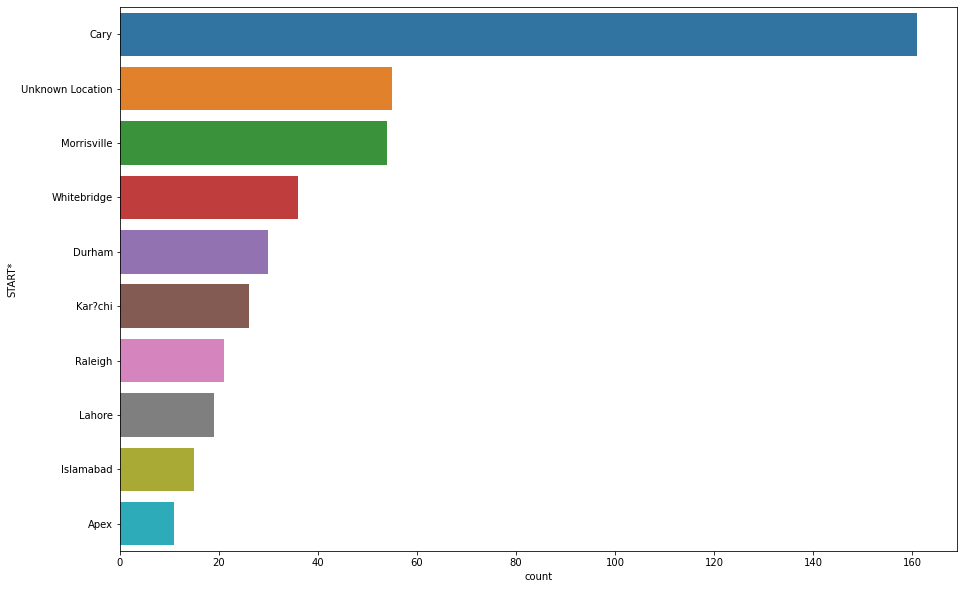

In [19]:
plt.figure(figsize=(15,10))
sns.countplot(y="START*",order= pd.value_counts(uber_df['START*']).iloc[:10].index, data=uber_df)
plt.show()

In [20]:
uber_df2 = uber_df[uber_df['START*']!= 'Unknown Location']
uber_df2 = uber_df2[uber_df2['STOP*']!= 'Unknown Location']

print(uber_df2)


           START_DATE*         END_DATE* CATEGORY*           START*  \
0       1/1/2016 21:11    1/1/2016 21:17  Business      Fort Pierce   
2       1/2/2016 20:25    1/2/2016 20:38  Business      Fort Pierce   
3       1/5/2016 17:31    1/5/2016 17:45  Business      Fort Pierce   
4       1/6/2016 14:42    1/6/2016 15:49  Business      Fort Pierce   
5       1/6/2016 17:15    1/6/2016 17:19  Business  West Palm Beach   
...                ...               ...       ...              ...   
1148  12/30/2016 16:45  12/30/2016 17:08  Business          Kar?chi   
1149  12/30/2016 23:06  12/30/2016 23:10  Business          Kar?chi   
1150   12/31/2016 1:07   12/31/2016 1:14  Business          Kar?chi   
1153  12/31/2016 21:32  12/31/2016 21:50  Business       Katunayake   
1154  12/31/2016 22:08  12/31/2016 23:51  Business          Gampaha   

                STOP*  MILES*         PURPOSE*  
0         Fort Pierce     5.1   Meal/Entertain  
2         Fort Pierce     4.8  Errand/Supplies  


In [21]:
uber_df2.groupby(['START*','STOP*'])['MILES*'].sum().sort_values(ascending=False).head(10)

START*        STOP*       
Cary          Durham          312.3
Latta         Jacksonville    310.3
Durham        Cary            298.4
Cary          Morrisville     293.7
Raleigh       Cary            269.5
Morrisville   Cary            250.6
Cary          Cary            233.9
              Raleigh         230.4
Jacksonville  Kissimmee       201.0
Boone         Cary            180.2
Name: MILES*, dtype: float64

F:\Program Files\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


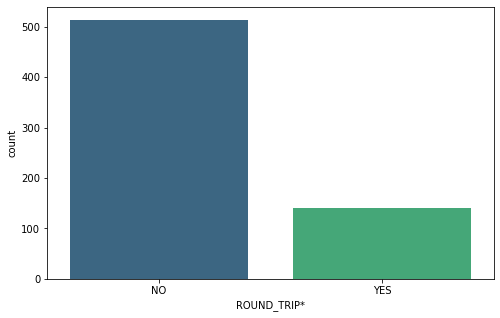

In [23]:
plt.figure(figsize=(8,5))
def round(x):
    if x['START*'] == x['STOP*']:
        return 'YES'
    else:
        return 'NO'
    
uber_df['ROUND_TRIP*'] = uber_df.apply(round, axis=1)

sns.countplot(uber_df['ROUND_TRIP*'], order=uber_df['ROUND_TRIP*'].value_counts().index, palette='viridis')
plt.show()


In [24]:
# Convert the START DATE and END_DATE in string format to datetime object

uber_df.loc[:, 'START_DATE*'] = uber_df['START_DATE*'].apply(lambda x: pd.datetime.strptime(x, '%m/%d/%Y %H:%M'))
uber_df.loc[:, 'END_DATE*'] = uber_df['END_DATE*'].apply(lambda x: pd.datetime.strptime(x, '%m/%d/%Y %H:%M'))

C:\Users\SANTHOSH RAM\AppData\Local\Temp\ipykernel_24508\2071733677.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  uber_df.loc[:, 'START_DATE*'] = uber_df['START_DATE*'].apply(lambda x: pd.datetime.strptime(x, '%m/%d/%Y %H:%M'))
C:\Users\SANTHOSH RAM\AppData\Local\Temp\ipykernel_24508\2071733677.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  uber_df.loc[:, 'END_DATE*'] = uber_df['END_DATE*'].apply(lambda x: pd.datetime.strptime(x, '%m/%d/%Y %H:%M'))


In [25]:
#Calculate the duration for the rides
uber_df['DIFF'] = uber_df['END_DATE*'] - uber_df['START_DATE*']

In [26]:
#convert duration to numbers(minutes)
uber_df.loc[:, 'DIFF'] = uber_df['DIFF'].apply(lambda x: pd.Timedelta.to_pytimedelta(x).days/(24*60) + pd.Timedelta.to_pytimedelta(x).seconds/60)

In [27]:
uber_df['DIFF'].head()

0     6.0
2    13.0
3    14.0
4    67.0
5     4.0
Name: DIFF, dtype: float64

In [28]:
uber_df['DIFF'].describe()

count    653.000000
mean      23.398162
std       25.769640
min        2.000000
25%       11.000000
50%       18.000000
75%       28.000000
max      330.000000
Name: DIFF, dtype: float64

In [29]:
#Capture Hour, Day, Month and Year of Ride in a separate column
uber_df['month'] = pd.to_datetime(uber_df['START_DATE*']).dt.month
uber_df['Year'] = pd.to_datetime(uber_df['START_DATE*']).dt.year
uber_df['Day'] = pd.to_datetime(uber_df['START_DATE*']).dt.day
uber_df['Hour'] = pd.to_datetime(uber_df['START_DATE*']).dt.hour

In [30]:
#Capture day of week and rename to weekday names
uber_df['day_of_week'] = pd.to_datetime(uber_df['START_DATE*']).dt.dayofweek
days = {0:'Mon',1:'Tue',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'}

uber_df['day_of_week'] = uber_df['day_of_week'].apply(lambda x: days[x])

In [31]:
import calendar
uber_df['month'] = uber_df['month'].apply(lambda x: calendar.month_abbr[x])
uber_df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,ROUND_TRIP*,DIFF,month,Year,Day,Hour,day_of_week
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,YES,6.0,Jan,2016,1,21,Fri
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,YES,13.0,Jan,2016,2,20,Sat
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,YES,14.0,Jan,2016,5,17,Tue
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,NO,67.0,Jan,2016,6,14,Wed
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,YES,4.0,Jan,2016,6,17,Wed


In [32]:
#Extract the total number of trips per month, weekday
print(uber_df['month'].value_counts())
print(uber_df['day_of_week'].value_counts())

Dec    134
Feb     82
Jun     73
Mar     71
Nov     60
Jan     59
Apr     50
May     46
Jul     46
Oct     20
Aug     12
Name: month, dtype: int64
Fri     125
Tue      94
Thur     92
Sun      87
Mon      87
Wed      85
Sat      83
Name: day_of_week, dtype: int64


F:\Program Files\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


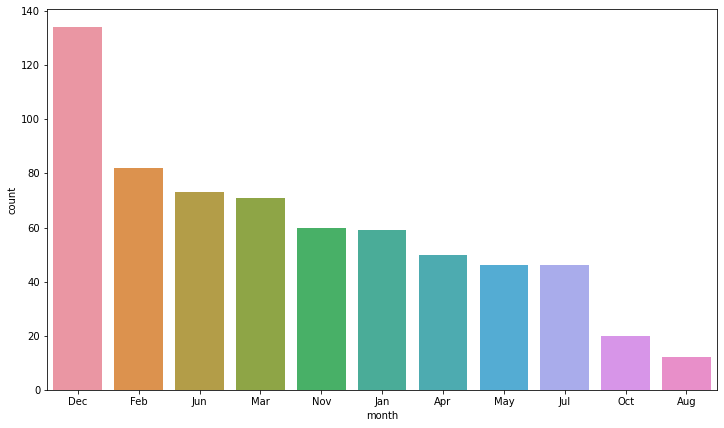

In [33]:
plt.figure(figsize=(12,7))
sns.countplot(uber_df['month'],order=pd.value_counts(uber_df['month']).index)
plt.show()

F:\Program Files\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


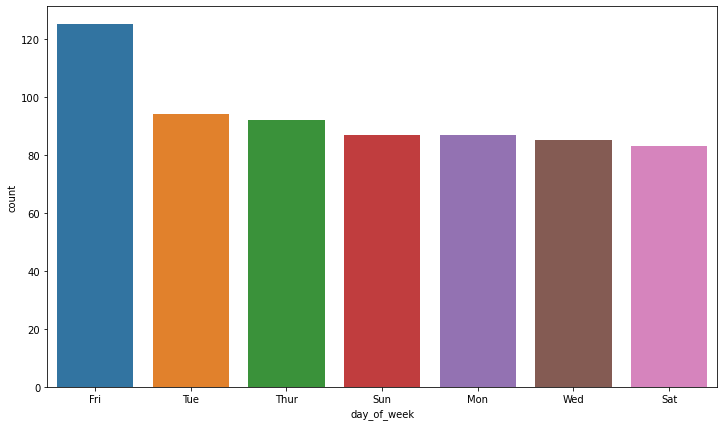

In [34]:
plt.figure(figsize=(12,7))
sns.countplot(uber_df['day_of_week'],order=pd.value_counts(uber_df['day_of_week']).index)
plt.show()

In [35]:
#Getting the average distance covered per month
uber_df.groupby('month').mean()['MILES*'].sort_values(ascending = False)

month
Oct    24.840000
Apr    21.898000
Mar    20.505634
Jul    10.615217
Nov    10.590000
Feb     8.868293
Jan     8.486441
May     7.793478
Jun     7.410959
Aug     7.341667
Dec     6.898507
Name: MILES*, dtype: float64

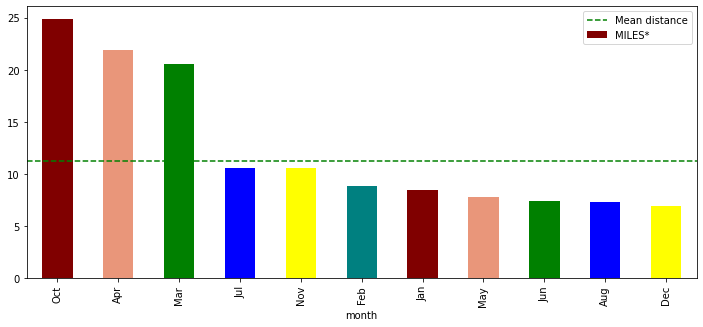

In [36]:
plt.figure(figsize=(12,5))
uber_df.groupby('month').mean()['MILES*'].sort_values(ascending = False).plot.bar(color=['maroon','darksalmon','green','blue','yellow','teal'])
plt.axhline(uber_df['MILES*'].mean(), linestyle='--', color='green', label='Mean distance')
plt.legend()
plt.show()

In [37]:
#Number of trips based of hour of day
uber_df['Hour'].value_counts()

13    55
14    52
17    51
15    51
18    51
16    45
20    45
12    43
11    39
19    35
21    34
10    33
9     26
23    21
22    21
8     17
0     13
7      8
1      4
3      3
5      3
6      2
2      1
Name: Hour, dtype: int64

F:\Program Files\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


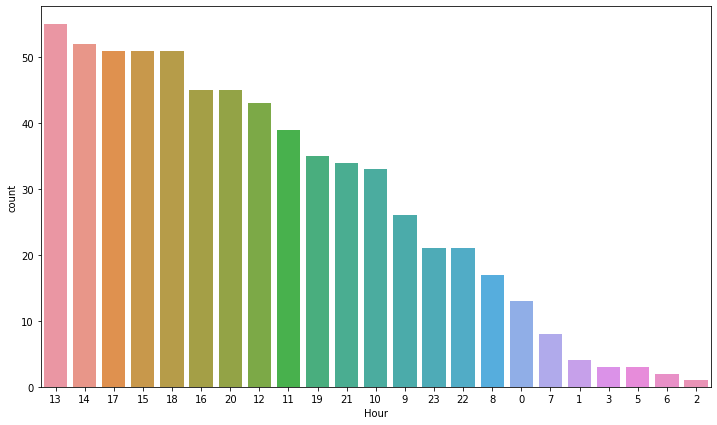

In [38]:
plt.figure(figsize=(12,7))
sns.countplot(uber_df['Hour'],order=pd.value_counts(uber_df['Hour']).index)
plt.show()

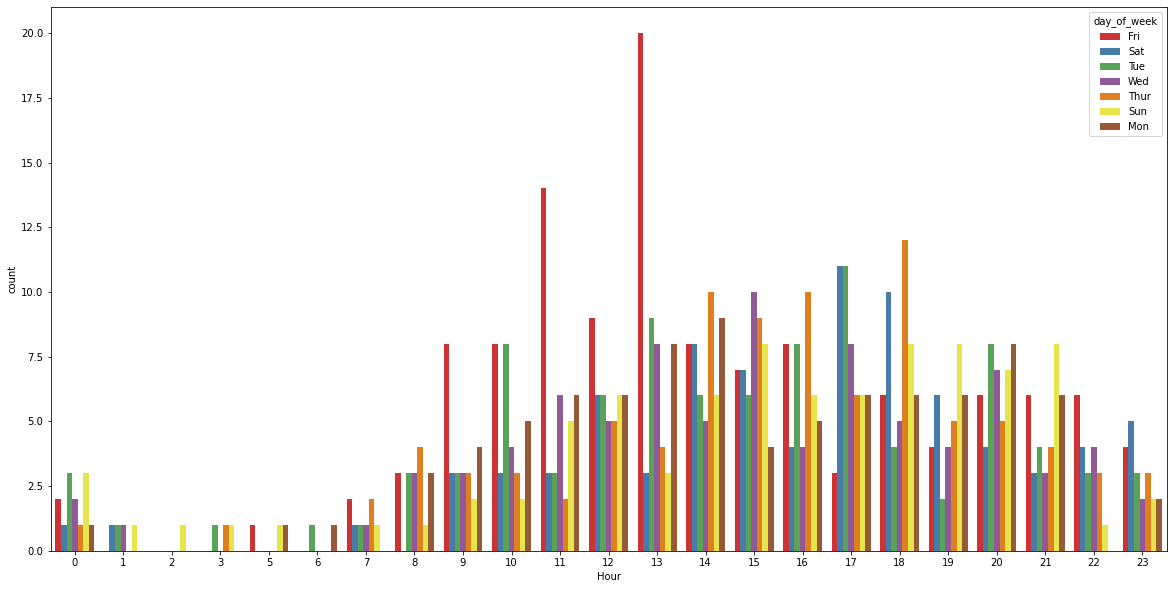

In [39]:

plt.figure(figsize=(20,10))
sns.countplot(data=uber_df, x=uber_df['Hour'], hue=uber_df['day_of_week'],
              palette="Set1", )
plt.show()

F:\Program Files\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


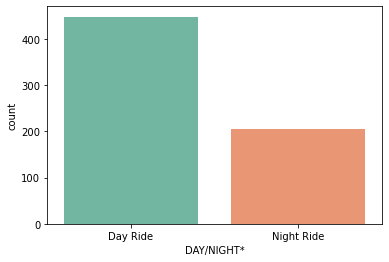

In [40]:
# Day Time or Night time 
a = pd.to_datetime(['18:00:00']).time
uber_df['DAY/NIGHT*'] = uber_df.apply(lambda x : 'Night Ride' if x['START_DATE*'].time() > a else 'Day Ride', axis=1)
sns.countplot(uber_df['DAY/NIGHT*'], palette='Set2' , order = uber_df['DAY/NIGHT*'].value_counts().index)
plt.show()

F:\Program Files\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


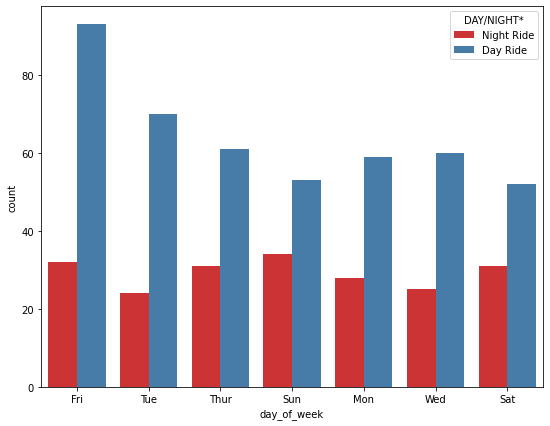

In [41]:
plt.figure(figsize=(9,7))
sns.countplot(uber_df['day_of_week'], hue=uber_df['DAY/NIGHT*'], palette='Set1' ,
              order=uber_df['day_of_week'].value_counts().index)
plt.show()

F:\Program Files\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


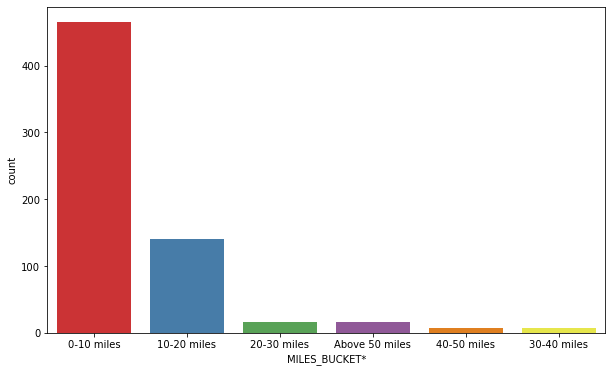

In [42]:
m = {}

for i in uber_df['MILES*']:
    for i in uber_df['MILES*']:
        if i < 10:
            m.setdefault(i,'0-10 miles')
        elif i >= 10 and i < 20:
            m.setdefault(i,'10-20 miles')
        elif i >= 20 and i < 30:
            m.setdefault(i,'20-30 miles')
        elif i >= 30 and i < 40:
            m.setdefault(i,'30-40 miles')
        elif i >= 40 and i < 50:
            m.setdefault(i,'40-50 miles')
        else:
            m.setdefault(i,'Above 50 miles')
            
uber_df['MILES_BUCKET*'] = uber_df['MILES*'].map(m)

plt.figure(figsize=(10,6))
sns.countplot(uber_df['MILES_BUCKET*'], palette='Set1' ,
              order = uber_df['MILES_BUCKET*'].value_counts().index)
plt.show()

F:\Program Files\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


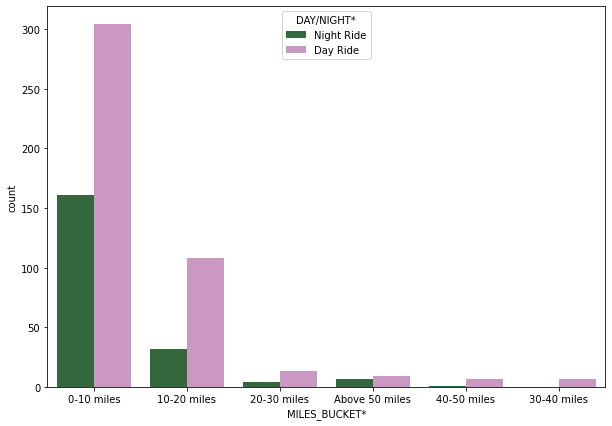

In [43]:
plt.figure(figsize=(10,7))
sns.countplot(uber_df['MILES_BUCKET*'], hue=uber_df['DAY/NIGHT*'], palette='cubehelix',
              order = uber_df['MILES_BUCKET*'].value_counts().index)
plt.show()

In [44]:
# calculate trip speed for each trip
uber_df['Duration_hours'] = uber_df['DIFF'] / 60
uber_df['Speed_KM'] = uber_df['MILES*'] / uber_df['Duration_hours']
uber_df['Speed_KM'].describe()

count    653.000000
mean      25.261340
std       16.815108
min        6.000000
25%       16.571429
50%       22.285714
75%       29.100000
max      228.000000
Name: Speed_KM, dtype: float64